In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
# print(torch.cuda.is_available())

2.9.1+cu130


# Introduction to Tensors

## Creating tensors
Multi-dimensional matrix containing elements of a single data type

In [2]:
# Scalar
scalar = torch.tensor(7)
print(scalar)

tensor(7)


In [3]:
scalar.ndim

0

In [4]:
# Convert scalar to Python number
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7, 7])
print(vector)

tensor([7, 7])


In [6]:
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
# MATRIX
MATRIX = torch.tensor([[7, 8], [9, 10]])
print(MATRIX)

tensor([[ 7,  8],
        [ 9, 10]])


In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
MATRIX[0]

tensor([7, 8])

In [12]:
MATRIX[1][0]

tensor(9)

In [13]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
print(TENSOR)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])


In [14]:
TENSOR.ndim

3

In [15]:
TENSOR.shape

torch.Size([3, 2, 3])

In [16]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [17]:
TENSOR[1][0]

tensor([7, 8, 9])

In [18]:
TENSOR[2][1][0]

tensor(16)

In [19]:
TENSOR1 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7,  8]]])
print(TENSOR1)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [20]:
TENSOR1.ndim

3

In [21]:
TENSOR1.shape

torch.Size([2, 2, 2])

### Random Tensors

Q. Why random tensors?
A. They are important because the way many neural networks learn is that they start with tensors full of random numbers, and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers -> ...`

In [22]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
print(random_tensor)

tensor([[0.1732, 0.0148, 0.2713, 0.0778],
        [0.4970, 0.2099, 0.5278, 0.1225],
        [0.3019, 0.9975, 0.1944, 0.5271]])


In [23]:
# Create a random tensor with similar shape to an image tensor
random_image_tensor = torch.rand(size=(3, 224, 224))  # color channels (R G B), height, width
print(random_image_tensor.shape)

torch.Size([3, 224, 224])


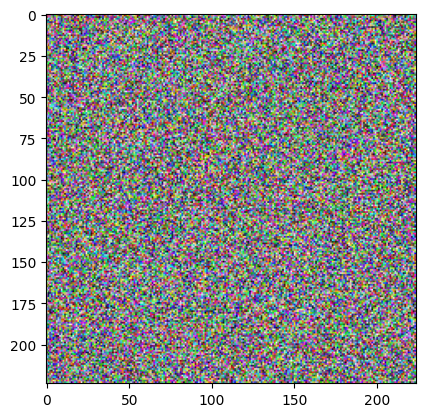

In [24]:
# displays a random image
plt.imshow(random_image_tensor.permute(1, 2, 0))  # permute changes the order of dimensions

### Zeros and ones

In [25]:
# Tensor of all zeros
zeros = torch.zeros(size=(3, 4))
print(zeros)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [26]:
zeros * random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
## Tensor of all ones
ones = torch.ones(size=(3, 4))
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [28]:
ones.dtype

torch.float32

In [29]:
random_tensor.dtype

torch.float32

### Create range of tensors and tensors-like

In [30]:
# Use torch.arange() to create a tensor of sequential numbers
one_to_ten = torch.arange(1, 11, 1) # torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
# Tensors-like objects
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

Ensure tensors are:
- Of right datatype
- Of right shape
- On the right device

In [32]:
# Float 32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                        dtype=None, # could be torch.float16, torch.float32, torch.float64
                        device=None, # could be 'cuda' for GPU, default is 'cpu'
                        requires_grad=False) # whether to track gradients for optimization
float_32_tensor.dtype

torch.float32

In [33]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.dtype

torch.float16

In [34]:
float_16_tensor * float_32_tensor # PyTorch will upcast the lower bit tensor to the higher bit tensor

tensor([ 9., 36., 81.])

In [35]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [36]:
float_32_tensor * int_32_tensor # PyTorch will upcast the integer tensor to float tensor

tensor([ 9., 36., 81.])

### Getting information/attributes from tensors

- tensor.dtype
- tensor.shape
- tensor.device

In [37]:
# Create a tensor
sample_tensor = torch.arange(1., 10.)
sample_tensor

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [38]:
# Find details
sample_tensor.ndim, sample_tensor.shape, sample_tensor.dtype, sample_tensor.device

(1, torch.Size([9]), torch.float32, device(type='cpu'))

In [39]:
print(f"Datatype of tensor: {sample_tensor.dtype}")
print(f"Shape of tensor: {sample_tensor.shape}")
print(f"Numel of tensor: {sample_tensor.numel()}")
print(f"Size of tensor: {sample_tensor.size()}")
print(f"Device of tensor: {sample_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([9])
Numel of tensor: 9
Size of tensor: torch.Size([9])
Device of tensor: cpu


In [40]:
# another_tensor = torch.rand(3, 4, dtype=torch.float16, device='cuda')
# another_tensor

In [41]:
# print(f"Datatype of another_tensor: {another_tensor.dtype}")
# print(f"Shape of another_tensor: {another_tensor.shape}")
# print(f"Numel of another_tensor: {another_tensor.numel()}")
# print(f"Device of another_tensor: {another_tensor.device}")

### Manipulating Tensors (operations)
- Addition
- Subtraction
- Multiplication (element-wise)
- Division
- Matrix multiplication (dot product)

In [42]:
# Create tensor and add 100 to it
tensor = torch.tensor([1, 2, 3])
tensor + 100

tensor([101, 102, 103])

In [43]:
# Create tensor and multiple 10 to it
tensor = torch.tensor([1, 2, 3])
tensor * 10

tensor([10, 20, 30])

In [44]:
# Create tensor and subtract 5 from it
tensor = torch.tensor([1, 2, 3])
tensor - 5

tensor([-4, -3, -2])

In [45]:
# PyTorch in-built functions
tensor = torch.tensor([1, 2, 3])
torch.add(tensor, 10), torch.mul(tensor, 10), torch.sub(tensor, 5)

(tensor([11, 12, 13]), tensor([10, 20, 30]), tensor([-4, -3, -2]))

### Matrix multiplication

Two rules:
- **Inner dimensions** must match
- Result matrix has the shape of the **outer dimensions**

In [46]:
# Element wise multiplication
print(tensor, "*", tensor, "=", tensor*tensor)

tensor([1, 2, 3]) * tensor([1, 2, 3]) = tensor([1, 4, 9])


In [47]:
# Matrix multiplication
print(torch.matmul(tensor.unsqueeze(0), tensor.unsqueeze(1)))  # unsqueeze adds an extra dimension

print(torch.matmul(tensor, tensor)) # tensor @ tensor, torch.mm(tensor, tensor))

tensor([[14]])
tensor(14)


In [48]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: total: 0 ns
Wall time: 735 μs


In [49]:
%%time
print(torch.matmul(tensor, tensor))

tensor(14)
CPU times: total: 0 ns
Wall time: 353 μs


### Shape errors: One of the most common in deep learning

In [50]:
torch.matmul(torch.rand(2, 5), torch.rand(size=(2, 5)))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x5 and 2x5)

### Manipulate the shape of a tensor
- Transpose: switches the axes or dimensions of a given tensor

In [51]:
tensor_B = torch.tensor([[1, 2],
                         [4, 5],
                        [7, 8]])
print(tensor_B)
print(tensor_B.shape)

tensor([[1, 2],
        [4, 5],
        [7, 8]])
torch.Size([3, 2])


In [52]:
print(tensor_B.T, tensor_B.T.shape)

tensor([[1, 4, 7],
        [2, 5, 8]]) torch.Size([2, 3])


In [53]:
tensor_A = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])
tensor_A

tensor([[1, 2, 3],
        [4, 5, 6]])

In [54]:
torch.mm(tensor_B, tensor_A)

tensor([[ 9, 12, 15],
        [24, 33, 42],
        [39, 54, 69]])

In [55]:
# Create tensor and divide by 2
tensor = torch.tensor([1, 2, 3])
tensor / 2

tensor([0.5000, 1.0000, 1.5000])

### Tensor aggregation

In [56]:
# Create a tensor
tensor = torch.arange(1, 100, 10)

In [57]:
# Min
tensor.min(), torch.min(tensor)

(tensor(1), tensor(1))

In [58]:
# Max
tensor.max(), torch.max(tensor)

(tensor(91), tensor(91))

In [59]:
# Find the mean - Mean requires tensor of float type
tensor.float().mean(), torch.mean(tensor.float())

(tensor(46.), tensor(46.))

In [60]:
# Find the sum
tensor.sum(), torch.sum(tensor)

(tensor(460), tensor(460))

### Positional min and max
Position in tensor which has min or max element

In [61]:
# argmin
tensor.argmin(), torch.argmin(tensor)

(tensor(0), tensor(0))

In [62]:
# argmax
tensor.argmax(), torch.argmax(tensor)

(tensor(9), tensor(9))

### Reshaping, viewing, squeezing, unsqueezing, and stacking
- Reshaping: changes the shape of input tensor
- Viewing: return a view of input tensor in a certain shape but keep the same memory as the original tensor
- Stacking: combine multiple tensors by different dimensions
- Squeeze: removes all `1` dimensions from a tensor
- Unsqueeze: adds a `1` dimension to a target tensor
- Permute: returns a view of the input with dimensions permuted in a certain way

In [63]:
# Create a tensor
x = torch.arange(1., 10.)
x

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [64]:
x.shape

torch.Size([9])

In [65]:
# Add a dimension
x_reshaped = x.reshape(1, 9)
x_reshaped.shape, x_reshaped
# x.reshape(1, 7) -> does not work, 9 ele cannot be reshaped to 7

(torch.Size([1, 9]), tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]))

In [66]:
# Change the view
z = x.view(1, 9)
z.shape, z, x

(torch.Size([1, 9]),
 tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [67]:
# Changing z changes x, as the view shares the same memory as the input
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [68]:
# Stack tensors on top of each other
tensor_A = torch.tensor([1, 2, 3])
tensor_B = torch.tensor([4, 5, 6])
stacked_tensor = torch.stack([tensor_A, tensor_B])
stacked_tensor.shape, stacked_tensor

(torch.Size([2, 3]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [69]:
# Stack along dim 1 (vertical axis)
hstacked_tensor = torch.stack([tensor_A, tensor_B], dim=1)
hstacked_tensor.shape, hstacked_tensor

(torch.Size([3, 2]),
 tensor([[1, 4],
         [2, 5],
         [3, 6]]))

In [70]:
torch.vstack([tensor_A, tensor_B])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [71]:
torch.hstack([tensor_A, tensor_B]) # Stack tensors horizontally

tensor([1, 2, 3, 4, 5, 6])

In [72]:
horizontally_stacked_tensor = torch.cat([tensor_A, tensor_B], dim=0)
horizontally_stacked_tensor.shape, horizontally_stacked_tensor

(torch.Size([6]), tensor([1, 2, 3, 4, 5, 6]))

In [73]:
# Squeezees all single dimensions
tensor_C = torch.zeros(size=(1, 3, 1, 4, 1))
tensor_C.shape, tensor_C.squeeze().shape, tensor_C.squeeze()

(torch.Size([1, 3, 1, 4, 1]),
 torch.Size([3, 4]),
 tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]))

In [74]:
# Unsqueezees a dimension at specified dimension
tensor_D = torch.tensor([1, 2, 3, 4])
tensor_D.shape, tensor_D.unsqueeze(0).shape, tensor_D.unsqueeze(1).shape

(torch.Size([4]), torch.Size([1, 4]), torch.Size([4, 1]))

In [75]:
# Permute the dimensions of a tensor - returns a view
# Used with images (need [height, width, color_channels] to [color_channels, height, width])
tensor_E = torch.randn(2, 3, 5)
tensor_E.shape, tensor_E.permute(2, 0, 1).shape # 2nd dim at 0, 0th dim at 1, 1st dim at 2

(torch.Size([2, 3, 5]), torch.Size([5, 2, 3]))

In [76]:
tensor_E_permuted = tensor_E.permute(2, 0, 1)
tensor_E, tensor_E_permuted

(tensor([[[-0.3100,  0.2908,  0.3684, -0.5998, -1.3164],
          [ 0.1940,  0.4073,  0.6074, -0.6457,  0.2944],
          [ 0.3903,  0.8477,  0.7872, -1.3406,  0.1801]],
 
         [[ 0.2739, -1.2545,  0.7002, -0.2256, -0.1863],
          [-0.3067,  0.1202, -0.2654,  0.7474, -0.5913],
          [-0.6627,  0.5726, -0.9787, -0.5376, -0.5174]]]),
 tensor([[[-0.3100,  0.1940,  0.3903],
          [ 0.2739, -0.3067, -0.6627]],
 
         [[ 0.2908,  0.4073,  0.8477],
          [-1.2545,  0.1202,  0.5726]],
 
         [[ 0.3684,  0.6074,  0.7872],
          [ 0.7002, -0.2654, -0.9787]],
 
         [[-0.5998, -0.6457, -1.3406],
          [-0.2256,  0.7474, -0.5376]],
 
         [[-1.3164,  0.2944,  0.1801],
          [-0.1863, -0.5913, -0.5174]]]))

In [77]:
tensor_E[0][0][1] = -0.1900 # should update in permuted view as well
tensor_E

tensor([[[-0.3100, -0.1900,  0.3684, -0.5998, -1.3164],
         [ 0.1940,  0.4073,  0.6074, -0.6457,  0.2944],
         [ 0.3903,  0.8477,  0.7872, -1.3406,  0.1801]],

        [[ 0.2739, -1.2545,  0.7002, -0.2256, -0.1863],
         [-0.3067,  0.1202, -0.2654,  0.7474, -0.5913],
         [-0.6627,  0.5726, -0.9787, -0.5376, -0.5174]]])

In [78]:
tensor_E_permuted

tensor([[[-0.3100,  0.1940,  0.3903],
         [ 0.2739, -0.3067, -0.6627]],

        [[-0.1900,  0.4073,  0.8477],
         [-1.2545,  0.1202,  0.5726]],

        [[ 0.3684,  0.6074,  0.7872],
         [ 0.7002, -0.2654, -0.9787]],

        [[-0.5998, -0.6457, -1.3406],
         [-0.2256,  0.7474, -0.5376]],

        [[-1.3164,  0.2944,  0.1801],
         [-0.1863, -0.5913, -0.5174]]])

### Indexing (selecting data from tensors)
Similar to indexing with NumPy

In [79]:
# Create a tensor
tensor = torch.arange(1, 10)
tensor

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
x = tensor.reshape(1, 3, 3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [81]:
# Index into x
x[0], x[0][1], x[0][1][2] # x[0], x[0, 1], x[0, 1, 2]

(tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]),
 tensor([4, 5, 6]),
 tensor(6))

In [82]:
x[:, :, 2]

tensor([[3, 6, 9]])

## PyTorch and NumPy

PyTorch requires NumPy
- Data in NumPy, required in PyTorch tensor -> `torch.from_numpy(ndarray)`
- PyTorch tensor to NumPy -> `torch.Tensor.numpy()`

In [83]:
# NumPy array to tensor
array = np.arange(1., 8.)
print(array, array.dtype, type(array))
tensor_from_array = torch.from_numpy(array).type(torch.float32)
print(tensor_from_array, tensor_from_array.dtype, type(tensor_from_array))
# NumPy default is float64, PyTorch default is float32

[1. 2. 3. 4. 5. 6. 7.] float64 <class 'numpy.ndarray'>
tensor([1., 2., 3., 4., 5., 6., 7.]) torch.float32 <class 'torch.Tensor'>


In [84]:
# Change the value of array, what happens to tensor_from_array?
array[0] = 100
array, tensor_from_array # No change in tensor_from_array

(array([100.,   2.,   3.,   4.,   5.,   6.,   7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.]))

**Note:** torch.Tensor.numpy() returns a NumPy view that *shares memory* with the original tensor. There's no guaranteed public `force=True` argument — do not rely on it. To get a NumPy array independent from the tensor use `.numpy().copy()` or make a clone of the tensor first: `tensor.clone().numpy()`.

In [85]:
# Tensor to NumPy array
tensor = torch.ones(7)
tensor, tensor.dtype, type(tensor)
tensor_to_array = tensor.numpy()  # shares memory with the original tensor
tensor_to_array, tensor_to_array.dtype, type(tensor_to_array)

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 dtype('float32'),
 numpy.ndarray)

In [86]:
# To get an independent NumPy array make an explicit copy:
tensor_to_array_copy = tensor.numpy().copy()  # independent NumPy copy
tensor_to_array_copy, tensor_to_array_copy.dtype, type(tensor_to_array_copy)

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 dtype('float32'),
 numpy.ndarray)

In [87]:
tensor_to_array_clone = tensor.clone().numpy()  # clone then numpy() -> independent from original
tensor_to_array_clone, tensor_to_array_clone.dtype, type(tensor_to_array_clone)

(array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 dtype('float32'),
 numpy.ndarray)

In [88]:
# Change the value of tensor, what happens to the arrays?
tensor[0] = 100
print('tensor ->', tensor)
print('tensor_to_array (shared memory) ->', tensor_to_array)  # this will change
print('tensor_to_array_copy (explicit copy) ->', tensor_to_array_copy)  # unchanged
print('tensor_to_array_clone (clone then numpy) ->', tensor_to_array_clone)  # unchanged


tensor -> tensor([100.,   1.,   1.,   1.,   1.,   1.,   1.])
tensor_to_array (shared memory) -> [100.   1.   1.   1.   1.   1.   1.]
tensor_to_array_copy (explicit copy) -> [1. 1. 1. 1. 1. 1. 1.]
tensor_to_array_clone (clone then numpy) -> [1. 1. 1. 1. 1. 1. 1.]


### Reproducibility (idempotency)

To reduce randomness, use a **seed**.

The seed "flavors" the randomness.

https://docs.pytorch.org/docs/stable/notes/randomness.html

In [89]:
# Set the random seed for reproducibility
torch.manual_seed(42)
tensor_A = torch.rand(3, 4)
torch.manual_seed(42)
tensor_B = torch.rand(3, 4)

print(tensor_A)
print(tensor_B)
print(tensor_A == tensor_B)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running PyTorch on the GPU
Faster computation on numbers

In [90]:
# Getting a GPU
!nvidia-smi

Tue Dec  2 21:28:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.80                 Driver Version: 581.80         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P0             33W /  200W |    1087MiB /  12282MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [91]:
# Check for GPU access
print(torch.cuda.is_available())

True


In [92]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

https://docs.pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code

In [93]:
# Count number of GPUs
torch.cuda.device_count()

1

## Putting tensors and models on the GPU

In [94]:
tensor = torch.tensor([1, 2, 3], device="cpu")
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [95]:
# move tensor to GPU, if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## Moving tensors back to the CPU

In [96]:
# Numpy requires tensors to be on CPU
tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

array([1, 2, 3])